In [ ]:
#Environment setting and loadinng the data fromm AWS.

In [25]:
import os
import time
import boto3
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sagemaker
from sagemaker import get_execution_role

In [26]:
sess = boto3.Session()
sm = sess.client("sagemaker")
role = get_execution_role()
sagemaker_session = sagemaker.Session(boto_session=sess)
bucket = sagemaker_session.default_bucket()
region = boto3.Session().region_name
model_package_group_name = "TF2-California-Housing"  # Model name in model registry
prefix = "tf2-california-housing-pipelines"
pipeline_name = "TF2CaliforniaHousingPipeline"  # SageMaker Pipeline name
current_time = time.strftime("%m-%d-%H-%M-%S", time.localtime())

In [7]:
#data_dir = os.path.join(os.getcwd(), "data")
#os.makedirs(data_dir, exist_ok=True)

#raw_dir = os.path.join(os.getcwd(), "data/raw")
#os.makedirs(raw_dir, exist_ok=True)

In [8]:
#!aws s3 cp s3://sagemaker-sample-files/datasets/tabular/california_housing/cal_housing.tgz .


download: s3://sagemaker-sample-files/datasets/tabular/california_housing/cal_housing.tgz to ./cal_housing.tgz


In [9]:
#!tar -zxf cal_housing.tgz --no-same-owner

In [27]:
columns = [
    "longitude",
    "latitude",
    "housingMedianAge",
    "totalRooms",
    "totalBedrooms",
    "population",
    "households",
    "medianIncome",
    "medianHouseValue",
]
cal_housing_df = pd.read_csv("CaliforniaHousing/cal_housing.data", names=columns, header=None)

In [28]:
cal_housing_df.head()

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  
0       322.0       126.0        8.3252          452600.0  
1      2401.0      1138.0        8.3014          358500.0  
2       496.0       177.0        7.2574          352100.0  
3       558.0       219.0        5.6431          341300.0  
4       565.0       259.0        3.8462          342200.0

In [29]:
X = cal_housing_df[
    [
        "longitude",
        "latitude",
        "housingMedianAge",
        "totalRooms",
        "totalBedrooms",
        "population",
        "households",
        "medianIncome",
    ]
]
Y = cal_housing_df[["medianHouseValue"]] / 100000

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

np.save(os.path.join(raw_dir, "x_train.npy"), x_train)
np.save(os.path.join(raw_dir, "x_test.npy"), x_test)
np.save(os.path.join(raw_dir, "y_train.npy"), y_train)
np.save(os.path.join(raw_dir, "y_test.npy"), y_test)
rawdata_s3_prefix = "{}/data/raw".format(prefix)
raw_s3 = sagemaker_session.upload_data(path="./data/raw/", key_prefix=rawdata_s3_prefix)
print(raw_s3)

s3://sagemaker-us-east-1-937752894384/tf2-california-housing-pipelines/data/raw


Otherway to download data and upload to s3 bucket

In [29]:
#%%sh
#apt-get install -y unzip
#wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
#unzip -c bank-additional.zip

Reading package lists...
Building dependency tree...
Reading state information...
unzip is already the newest version (6.0-23+deb10u3).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Archive:  bank-additional.zip
 extracting: bank-additional/        

  inflating: bank-additional/.DS_Store  
   Bud1           %                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

--2023-04-04 09:38:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

     0K .......... .......... .......... .......... .......... 11%  376K 1s
    50K .......... .......... .......... .......... .......... 23%  730K 1s
   100K .......... .......... .......... .......... .......... 34% 34.9M 0s
   150K .......... .......... .......... .......... .......... 46% 43.4M 0s
   200K .......... .......... .......... .......... .......... 57%  744K 0s
   250K .......... .......... .......... .......... .......... 69% 57.9M 0s
   300K .......... .......... .......... .......... .......... 80% 59.8M 0s
   350K .......... .......... .......... .......... .......... 92% 94.

In [35]:
#!unzip -o bank-additional.zip

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [116]:
import pandas as pd
data = pd.read_csv('./bank-additional/bank-additional-full.csv', sep=';')
data.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

In [117]:
import sagemaker
prefix = 'sagemaker/tutorial-autopilot/input'
sess = sagemaker.Session()
uri = sess.upload_data(path="./bank-additional/bank-additional-full.csv",key_prefix=prefix)
print(uri)

s3://sagemaker-us-east-1-937752894384/sagemaker/tutorial-autopilot/input/bank-additional-full.csv


In [118]:
#Define IAM role
import boto3
from sagemaker import get_execution_role
role = get_execution_role() 


In [119]:
import numpy
import pandas
import matplotlib.pyplot as plt
from IPython.display import Image, display
from time import gmtime, strftime
import sys
import math
import json
import os


EDA analysis on data

col_0          % observations
job                          
admin.               0.253035
blue-collar          0.224677
entrepreneur         0.035350
housemaid            0.025736
management           0.070992
retired              0.041760
self-employed        0.034500
services             0.096363
student              0.021244
technician           0.163713
unemployed           0.024619
unknown              0.008012

col_0     % observations
marital                 
divorced        0.111974
married         0.605225
single          0.280859
unknown         0.001942

col_0                % observations
education                          
basic.4y                   0.101389
basic.6y                   0.055647
basic.9y                   0.146766
high.school                0.231014
illiterate                 0.000437
professional.course        0.127294
university.degree          0.295426
unknown                    0.042027

col_0    % observations
default                
no             0.791201
unknown        0.208726
yes            0.000073

col_0    % observations
housing                
no             0.452122
unknown        0.024036
yes            0.523842

col_0    % observations
loan                   
no             0.824269
unknown        0.024036
yes            0.151695

col_0      % observations
contact                  
cellular         0.634748
telephone        0.365252

col_0  % observations
month                
apr          0.063902
aug          0.149995
dec          0.004419
jul          0.174177
jun          0.129115
mar          0.013256
may          0.334296
nov          0.099568
oct          0.017432
sep          0.013839

col_0        % observations
day_of_week                
fri                0.190031
mon                0.206711
thu                0.209357
tue                0.196416
wed                0.197485

col_0        % observations
poutcome                   
failure            0.103234
nonexistent        0.863431
success            0.033335

col_0  % observations
y                    
no           0.887346
yes          0.112654

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

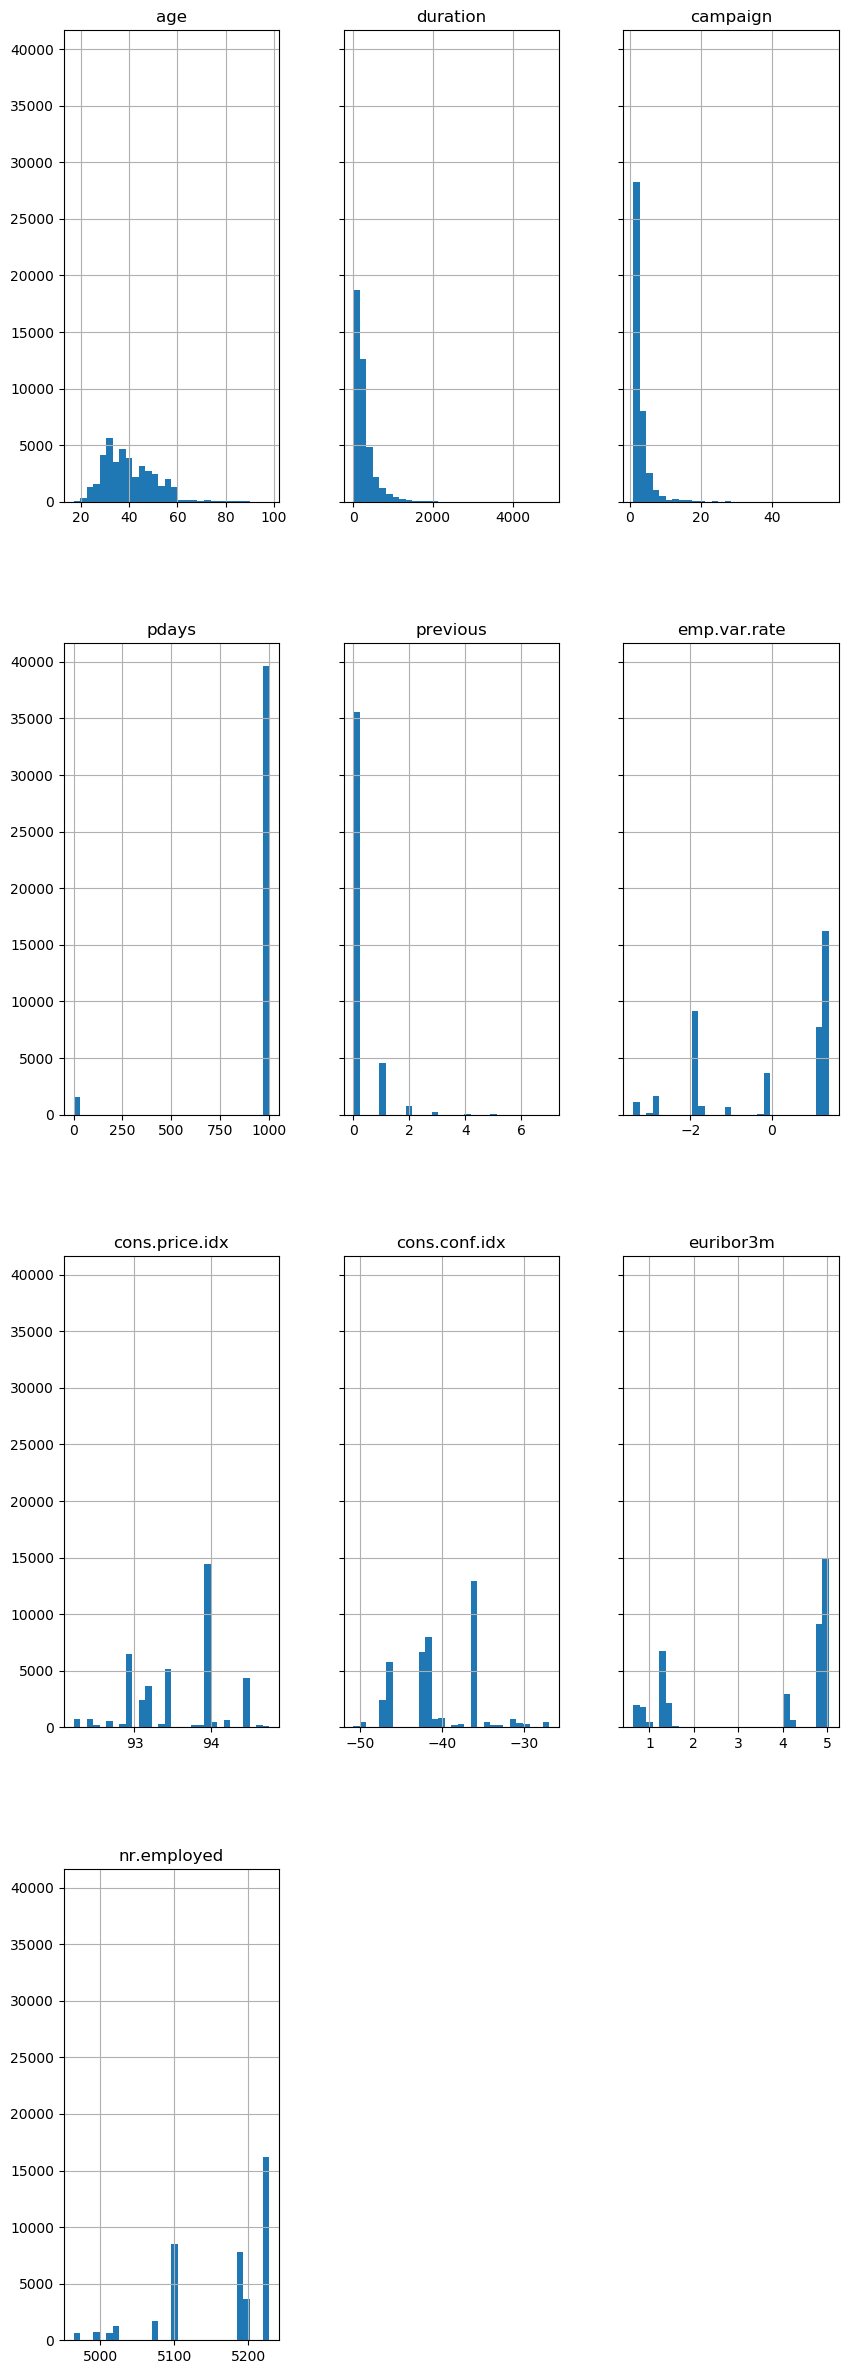

In [120]:
#frequency tables for each categorical features 
for column in data.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=data[column], columns='% observations',normalize='columns'))

display(data.describe())
%matplotlib inline
hist = data.hist(bins=30, sharey=True, figsize=(10,30))


Display correlation

In [121]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [122]:
data['no_previous_contact']=np.where(data['pdays'] == 999, 1, 0)
data['not_working'] = np.where(np.in1d(data['job'],['student','retired', 'unemployed']),1,0)
model_data = pd.get_dummies(data)

In [123]:
model_data.columns
model_data.shape

(41188, 67)

In [124]:
train_data, validation_data,  test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7 * len(model_data)),  int(0.9 * len(model_data))])
train_data.shape, validation_data, test_data.shape

((28831, 67),
        age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
 10498   29       170         2    999         0           1.4          94.465   
 9988    30       597        10    999         0           1.4          94.465   
 10149   32       281         1    999         0           1.4          94.465   
 38365   25       123         1    999         0          -3.4          92.431   
 18230   35       288         2    999         0           1.4          93.918   
 ...    ...       ...       ...    ...       ...           ...             ...   
 24141   35       139         1    999         0          -0.1          93.200   
 35974   55       123         2    999         0          -1.8          92.893   
 26700   36       105         2    999         1          -0.1          93.200   
 14702   25       159         6    999         0           1.4          93.918   
 986     34       123         1    999         0           1.1          93.994   
 


In [125]:
train_data.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
40949   54        99         3    999         0          -1.1          94.601   
9332    56       143         2    999         0           1.4          94.465   
32286   32       120         2    999         0          -1.8          92.893   
3925    46       134         3    999         0           1.1          93.994   
9406    35        34         2    999         0           1.4          94.465   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
40949          -49.5      0.987       4963.6  ...                0   
9332           -41.8      4.967       5228.1  ...                1   
32286          -46.2      1.313       5099.1  ...                1   
3925           -36.4      4.858       5191.0  ...                0   
9406           -41.8      4.967       5228.1  ...                1   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
40949                0                1                0                0   
9332                 0                0                0                0   
32286                0                0                0                0   
3925                 1                0                0                0   
9406                 0                0                0                0   

       poutcome_failure  poutcome_nonexistent  poutcome_success  y_no  y_yes  
40949                 0                     1                 0     1      0  
9332                  0                     1                 0     1      0  
32286                 0                     1                 0     1      0  
3925                  0                     1                 0     1      0  
9406                  0                     1                 0     1      0  

[5 rows x 67 columns]

In [126]:
pd.concat([train_data['y_yes'], train_data.drop(['y_no', 'y_yes'], axis=1)], axis=1).to_csv('train.csv', index=False, header=False)
pd.concat([train_data['y_yes'], validation_data.drop(['y_no', 'y_yes'], axis=1)], axis=1).to_csv('validation_data.csv', index=False, header=False)

pd.concat([test_data['y_yes'], test_data.drop(['y_no', 'y_yes'], axis=1)], axis=1).to_csv('test.csv', index=False, header=False)
pd.concat([test_data.drop(['y_no', 'y_yes'], axis=1)], axis=1).to_csv('test_features.csv', index=False, header=False)

In [127]:
bucket = sagemaker.Session().default_bucket()

In [128]:
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation_data/validation_data.csv')).upload_file('validation_data.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test/test.csv')).upload_file('test.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test/test_features.csv')).upload_file('test.csv')


#s3_input_train = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [129]:
ls

CaliforniaHousing/  bank-additional.zip  preprocess.py      validation_data.csv
Untitled.ipynb      cal_housing.tgz      test.csv
__MACOSX/           data/                test_features.csv
bank-additional/    evaluate.py          train.csv


In [130]:
model_data=model_data.drop(['duration'])

KeyError: "['duration'] not found in axis"

In [131]:
# display(data.corr())
# pd.plotting.scatter_matrix(data, figsize=(12,12))
# plt.show()


#Training the model

All these built-in ML algorithms in AWS are in the form of image containers, therefore get_image_uri helps us to access those containers.

In [132]:
from sagemaker import image_uris
container = image_uris.retrieve('xgboost', region = boto3.Session().region_name, version='latest' )

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [133]:
s3_input_trian = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/validation'.format(bucket, prefix), content_type='csv')

In [134]:
sess

In [135]:

xgb = sagemaker.estimator.Estimator(image_uri = container,
                                         hyperparameters = hyperparameters,
                                         role = sagemaker.get_execution_role(),
                                         instance_count = 1,
                                         instance_type = 'ml.m5.2xlarge',
                                         output_path = 's3://{}/{}/output'.format(bucket, prefix),
                                         sagemaker_session=sess)

xgb.set_hyperparameters(max_depth=5, eta=0.2, gamma=4, min_child_weight=6, subsample=0.7, objective='binary:logistic', num_round=50)
xgb.fit({'train':s3_input_trian, 'validation':s3_input_validation})
                                         # train_use_spot_instance = True,
                                         # train_max_run = 300,
                                         # train_max_wait = 600)

INFO:sagemaker:Creating training-job with name: xgboost-2023-04-18-16-18-40-405


2023-04-18 16:18:49 Starting - Starting the training job......
2023-04-18 16:19:49 Downloading - Downloading input data...
2023-04-18 16:20:09 Training - Downloading the training image...
2023-04-18 16:20:39 Training - Training image download completed. Training in progress...Arguments: train
[2023-04-18:16:20:57:INFO] Running standalone xgboost training.
[2023-04-18:16:20:57:INFO] File size need to be processed in the node: 8.38mb. Available memory size in the node: 23673.67mb
[2023-04-18:16:20:57:INFO] Determined delimiter of CSV input is ','
[16:20:57] S3DistributionType set as FullyReplicated
[16:20:57] 28831x65 matrix with 1874015 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2023-04-18:16:20:57:INFO] Determined delimiter of CSV input is ','
[16:20:57] S3DistributionType set as FullyReplicated
[16:20:57] 37069x65 matrix with 2380654 entries loaded from /opt/ml/input/data/validation/validation_data?format=csv&label_column=0&delimiter=,
[16:20:5

Deployment

In [137]:
xgb_predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m5.2xlarge')

INFO:sagemaker:Creating model with name: xgboost-2023-04-18-16-22-27-929
INFO:sagemaker:Creating endpoint-config with name xgboost-2023-04-18-16-22-27-929
INFO:sagemaker:Creating endpoint with name xgboost-2023-04-18-16-22-27-929


ResourceLimitExceeded: An error occurred (ResourceLimitExceeded) when calling the CreateEndpoint operation: The account-level service limit 'ml.m5.2xlarge for endpoint usage' is 1 Instances, with current utilization of 1 Instances and a request delta of 1 Instances. Please contact AWS support to request an increase for this limit.

In [21]:
from sagemaker.workflow.parameters import ParameterInteger, ParameterString, ParameterFloat

# raw input data
input_data = ParameterString(name="InputData", default_value=raw_s3)

# training step parameters
training_epochs = ParameterString(name="TrainingEpochs", default_value="100")

# model performance step parameters
accuracy_mse_threshold = ParameterFloat(name="AccuracyMseThreshold", default_value=0.75)

# Inference step parameters
endpoint_instance_type = ParameterString(name="EndpointInstanceType", default_value="ml.m5.large")

Correlation analysis

In [22]:
%%writefile preprocess.py

import glob
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

if __name__ == "__main__":

    input_files = glob.glob("{}/*.npy".format("/opt/ml/processing/input"))
    print("\nINPUT FILE LIST: \n{}\n".format(input_files))
    scaler = StandardScaler()
    x_train = np.load(os.path.join("/opt/ml/processing/input", "x_train.npy"))
    scaler.fit(x_train)
    for file in input_files:
        raw = np.load(file)
        # only transform feature columns
        if "y_" not in file:
            transformed = scaler.transform(raw)
        if "train" in file:
            if "y_" in file:
                output_path = os.path.join("/opt/ml/processing/train", "y_train.npy")
                np.save(output_path, raw)
                print("SAVED LABEL TRAINING DATA FILE\n")
            else:
                output_path = os.path.join("/opt/ml/processing/train", "x_train.npy")
                np.save(output_path, transformed)
                print("SAVED TRANSFORMED TRAINING DATA FILE\n")
        else:
            if "y_" in file:
                output_path = os.path.join("/opt/ml/processing/test", "y_test.npy")
                np.save(output_path, raw)
                print("SAVED LABEL TEST DATA FILE\n")
            else:
                output_path = os.path.join("/opt/ml/processing/test", "x_test.npy")
                np.save(output_path, transformed)
                print("SAVED TRANSFORMED TEST DATA FILE\n")

Writing preprocess.py


In [23]:
from sagemaker.sklearn.processing import SKLearnProcessor
from sagemaker.processing import ProcessingInput, ProcessingOutput
from sagemaker.workflow.steps import ProcessingStep

framework_version = "1.2-1"

# Create SKlearn processor object,
# The object contains information about what instance type to use, the IAM role to use etc.
# A managed processor comes with a preconfigured container, so only specifying version is required.
sklearn_processor = SKLearnProcessor(
    framework_version=framework_version,
    role=role,
    instance_type="ml.m5.large",
    instance_count=1,
    base_job_name="tf2-california-housing-processing-job",
)

# Use the sklearn_processor in a Sagemaker pipelines ProcessingStep
step_preprocess_data = ProcessingStep(
    name="Preprocess-California-Housing-Data",
    processor=sklearn_processor,
    inputs=[
        ProcessingInput(source=input_data, destination="/opt/ml/processing/input"),
    ],
    outputs=[
        ProcessingOutput(output_name="train", source="/opt/ml/processing/train"),
        ProcessingOutput(output_name="test", source="/opt/ml/processing/test"),
    ],
    code="preprocess.py",
)

In [24]:
from sagemaker.tensorflow import TensorFlow
from sagemaker.inputs import TrainingInput
from sagemaker.workflow.steps import TrainingStep
from sagemaker.workflow.step_collections import RegisterModel
import time

# Where to store the trained model
model_path = f"s3://{bucket}/{prefix}/model/"

hyperparameters = {"epochs": training_epochs}
tensorflow_version = "2.11.0"
python_version = "py39"

tf2_estimator = TensorFlow(
    source_dir="code",
    entry_point="train.py",
    instance_type="ml.m5.large",
    instance_count=1,
    framework_version=tensorflow_version,
    role=role,
    base_job_name="tf2-california-housing-train",
    output_path=model_path,
    hyperparameters=hyperparameters,
    py_version=python_version,
)

# Use the tf2_estimator in a Sagemaker pipelines ProcessingStep.
# NOTE how the input to the training job directly references the output of the previous step.
step_train_model = TrainingStep(
    name="Train-California-Housing-Model",
    estimator=tf2_estimator,
    inputs={
        "train": TrainingInput(
            s3_data=step_preprocess_data.properties.ProcessingOutputConfig.Outputs[
                "train"
            ].S3Output.S3Uri,
            content_type="text/csv",
        ),
        "test": TrainingInput(
            s3_data=step_preprocess_data.properties.ProcessingOutputConfig.Outputs[
                "test"
            ].S3Output.S3Uri,
            content_type="text/csv",
        ),
    },
)

In [25]:
%%writefile evaluate.py

import os
import json
import subprocess
import sys
import numpy as np
import pathlib
import tarfile


def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])


if __name__ == "__main__":

    install("tensorflow==2.11.0")
    model_path = f"/opt/ml/processing/model/model.tar.gz"
    with tarfile.open(model_path, "r:gz") as tar:
        tar.extractall("./model")
    import tensorflow as tf

    model = tf.keras.models.load_model("./model/1")
    test_path = "/opt/ml/processing/test/"
    x_test = np.load(os.path.join(test_path, "x_test.npy"))
    y_test = np.load(os.path.join(test_path, "y_test.npy"))
    scores = model.evaluate(x_test, y_test, verbose=2)
    print("\nTest MSE :", scores)

    # Available metrics to add to model: https://docs.aws.amazon.com/sagemaker/latest/dg/model-monitor-model-quality-metrics.html
    report_dict = {
        "regression_metrics": {
            "mse": {"value": scores, "standard_deviation": "NaN"},
        },
    }

    output_dir = "/opt/ml/processing/evaluation"
    pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)

    evaluation_path = f"{output_dir}/evaluation.json"
    with open(evaluation_path, "w") as f:
        f.write(json.dumps(report_dict))

Writing evaluate.py


In [26]:
from sagemaker.workflow.properties import PropertyFile

# Create SKLearnProcessor object.
# The object contains information about what container to use, what instance type etc.
evaluate_model_processor = SKLearnProcessor(
    framework_version=framework_version,
    instance_type="ml.m5.large",
    instance_count=1,
    base_job_name="tf2-california-housing-evaluate",
    role=role,
)

# Create a PropertyFile
# A PropertyFile is used to be able to reference outputs from a processing step, for instance to use in a condition step.
# For more information, visit https://docs.aws.amazon.com/sagemaker/latest/dg/build-and-manage-propertyfile.html
evaluation_report = PropertyFile(
    name="EvaluationReport", output_name="evaluation", path="evaluation.json"
)

# Use the evaluate_model_processor in a Sagemaker pipelines ProcessingStep.
step_evaluate_model = ProcessingStep(
    name="Evaluate-California-Housing-Model",
    processor=evaluate_model_processor,
    inputs=[
        ProcessingInput(
            source=step_train_model.properties.ModelArtifacts.S3ModelArtifacts,
            destination="/opt/ml/processing/model",
        ),
        ProcessingInput(
            source=step_preprocess_data.properties.ProcessingOutputConfig.Outputs[
                "test"
            ].S3Output.S3Uri,
            destination="/opt/ml/processing/test",
        ),
    ],
    outputs=[
        ProcessingOutput(output_name="evaluation", source="/opt/ml/processing/evaluation"),
    ],
    code="evaluate.py",
    property_files=[evaluation_report],
)